# Seminar 02: Quantization

Run the cell below to import the required libraries. (If necessary install missing Python Packages beforehand.)

In [97]:
# Imports
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

Enter your Matrikel Number below to get which signal to use:

In [98]:
student_id="63735" # Enter your Student ID (Matrikel Number) here.

Run the cell bellow to get the signal to use:

In [99]:
print("Student ID:", student_id)
seed=0
for c in student_id:
    seed+=ord(c)
np.random.seed(seed)
r=np.random.rand()

if r<1.0/3:
    sample_rate=48000
    sine_frequency = 480*4
    sine_amplitude = 48
    sine_duration = 2
    n_bits = 4
elif(r<2.0/3):
    sample_rate=24000
    sine_frequency = 480*2
    sine_amplitude = 24
    sine_duration = 4
    n_bits  = 5
else:
    sample_rate=12000
    sine_frequency = 480
    sine_amplitude = 12
    sine_duration = 8
    n_bits = 6

print(f"You must use:\nsampling rate:{sample_rate}\namplitude:{sine_amplitude}\nfrequency:{sine_frequency} Hz\nduration:{sine_duration} seconds\nnumber of bits for quantization:{n_bits}")

Student ID: 63735
You must use:
sampling rate:12000
amplitude:12
frequency:480 Hz
duration:8 seconds
number of bits for quantization:6


You must fill the function below with your code using the requirements above.
You must use the variable names described in the function for both arguments and returns.

In [100]:
def generate_sine_student(sample_rate,sine_frequency,sine_amplitude,sine_duration):
    """
    This function returns a time vector (numpy array) and sine wave values (numpy array)
    according to the funcion arguments.
    
    Paramenters:
    ------------
    sample_rate : numpy array
                  The sample rate assigned to you in this assignment.
    sine_frequency : int
                  The sine wave frequency assigned to you in this assignment.
    sine_amplitude : int
                  The amplitude of the sine wave assigned to you in this assignment.
    sine_duration : int
                  The duration ot the sine wave in seconds assigned to you in this assignment.
    
    Returns:
    --------
    t : numpy array
        An array with the time values for the sine wave values.
    sine_wave : numpy array
        An array with the sine wave value for each value in the time array t.
    
    """
    # Start your code here
    # Calculating time taken by one sample
    T_Peroid = 1 / sample_rate
    # Calculating number of sin wave piont created the in the given time.
    N_pionts = sample_rate * sine_duration
    # Creating an array having time values for the sine wave values.
    t = np.arange(N_pionts) * T_Peroid
    # Sine Wave
    sine_wave = sine_amplitude * np.sin (2 * np.pi * sine_frequency * t)
        
    
    
    
    
    # End your code before here...
    return t, sine_wave

Run the cell below to print the values of your function (For your checking only):

In [101]:
t_student, sine_wave_student = generate_sine_student(sample_rate,sine_frequency,sine_amplitude,sine_duration)
print(t_student)
print(sine_wave_student)

[0.00000000e+00 8.33333333e-05 1.66666667e-04 ... 7.99975000e+00
 7.99983333e+00 7.99991667e+00]
[ 0.          2.98427865  5.78104409 ... -8.21456527 -5.78104409
 -2.98427865]


Complete the function below that takes as an argument the time vector 't' and the array 'sine_wave' and returns the Mid_Rise quantized values.

In [102]:
def rise_quantization_student(n_bits, sine_amplitude, sine_wave):
    """
    This function quantizes an input signal 'sine_wave' using the parameters in the functions arguments.
    It returns a numpy array with the quantized values.
    
    Parameters:
    -----------
    n_bits : int
            The number of bits used for quantization.
    sine_amplitude : 
    """
    # Start your code here
    #Finding delta
    step_size= (2* sine_amplitude)/(2**n_bits)
    #Quantized Values
    sinewave_quant_rise_quantize = np.floor(sine_wave/step_size)
    #De-Quantized Values
    sinewave_quant_rise_rec=sinewave_quant_rise_quantize*step_size+step_size/2
    # End your code before here...
    return sinewave_quant_rise_rec

In [103]:
quantized_values = rise_quantization_student(n_bits, sine_amplitude, sine_wave_student)
print(quantized_values)

[ 0.1875  2.8125  5.8125 ... -8.0625 -5.8125 -2.8125]


Complete the function below that takes as an argument the time vector 't' and the array 'sine_wave' and returns the Mid_Tread quantized values.

In [104]:
def tread_quantization_student(n_bits, sine_amplitude, sine_wave):
    """
    This function quantizes an input signal 'sine_wave' using the parameters in the functions arguments.
    It returns a numpy array with the quantized values.
    
    Parameters:
    -----------
    n_bits : int
            The number of bits used for quantization.
    sine_amplitude : 
    """
    # Start your code here
    #Finding delta
    step_size= (2* sine_amplitude)/(2**n_bits)
    #Quantized Values
    sinewave_quant_tread_quant = np.round(sine_wave/step_size)
    #De-Quantized Values
    sinewave_quant_tread_rec=sinewave_quant_tread_quant*step_size
    # End your code before here...
    return sinewave_quant_tread_rec

In [105]:
dequantized_values = tread_quantization_student(n_bits, sine_amplitude, sine_wave_student)
print(dequantized_values)

[ 0.     3.     5.625 ... -8.25  -5.625 -3.   ]


Plot only 1 cycle of the orignal sine wave, and Rise  values and the Tread quantized values all in one plot.
Your plot must contain title, axis labels, legend, grid, to look like the plot below.
First run the cell bello to see the plot example.

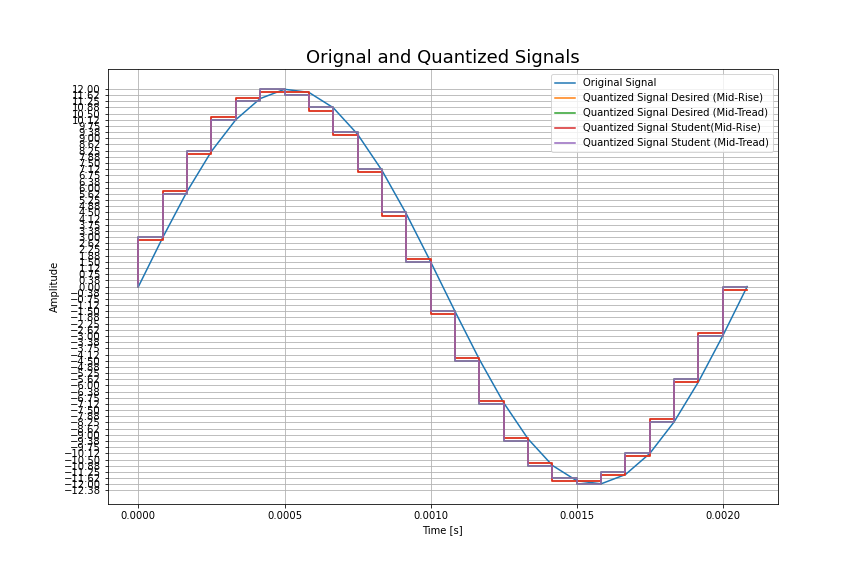

In [106]:
from IPython.display import Image
import IPython.display as ipd
 
if r<1.0/3:
    display(Image(filename='plot_r1.png'))
elif(r<2.0/3):
    display(Image(filename='plot_r2.png'))
else:
    display(Image(filename='plot_r3.png'))

Now, write your code for plotting.

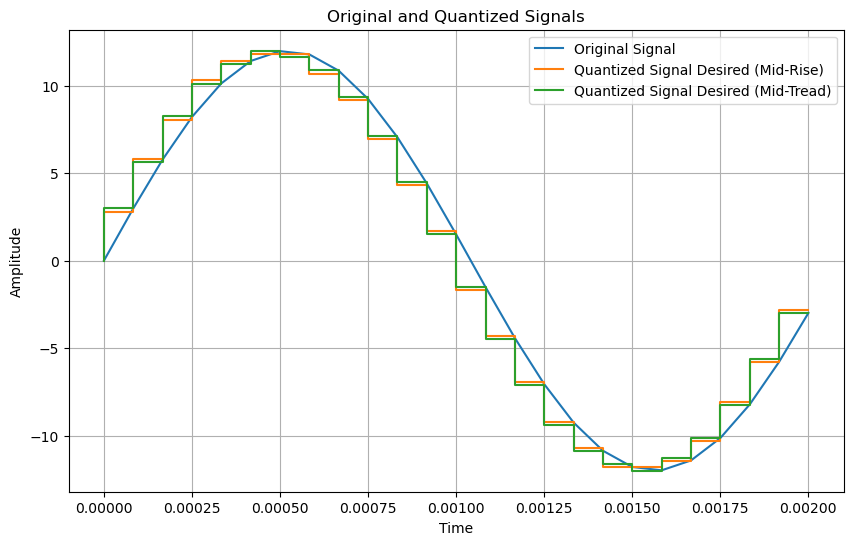

In [109]:
# Start your code here
# Create a figure
plt.figure(figsize=(10,6))

#title and labels
plt.title("Original and Quantized Signals")
plt.xlabel("Time")
plt.ylabel("Amplitude")

# Plot
fig_range = sample_rate/sine_frequency
period=np.round(fig_range).astype(int)
plt.plot(t_student[0:period],sine_wave_student[0:period])
plt.step(t_student[0:period],quantized_values[0:period])
plt.step(t_student[0:period],dequantized_values[0:period])

# Adding grid
plt.grid()
# Adding legend
plt.legend(['Original Signal', 'Quantized Signal Desired (Mid-Rise)', 'Quantized Signal Desired (Mid-Tread)'])

plt.show()
# End your code before here...